In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
with open(r'C:\Users\HP\Desktop\FILES\Intrusion-Detection-System-master\Intrusion-Detection-System-master\dataset\kddcup.names', 'r') as f:
    print(f.read())


back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [5]:
with open(r"C:\Users\HP\Desktop\FILES\Intrusion-Detection-System-master\Intrusion-Detection-System-master\dataset\training_attack_types", 'r') as f:
    print(f.read())


back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [6]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [8]:
path = r"C:\Users\HP\Desktop\FILES\Intrusion-Detection-System-master\Intrusion-Detection-System-master\dataset\kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)
#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [9]:
df.shape

(494021, 43)

In [10]:
df['target'].value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [11]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [12]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING

In [14]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [15]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'protocol_type', 'service']

CATEGORICAL FEATURES DISTRIBUTION

In [17]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

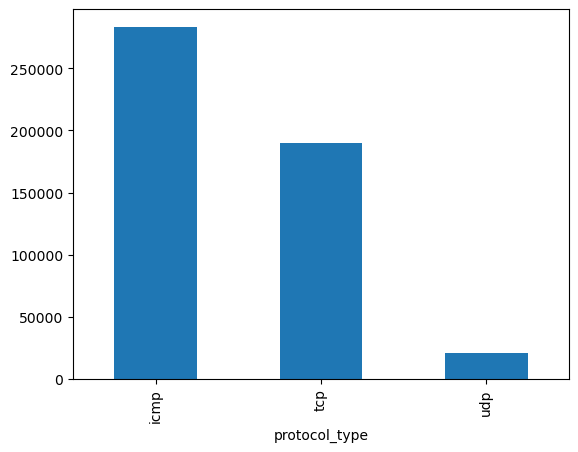

In [18]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

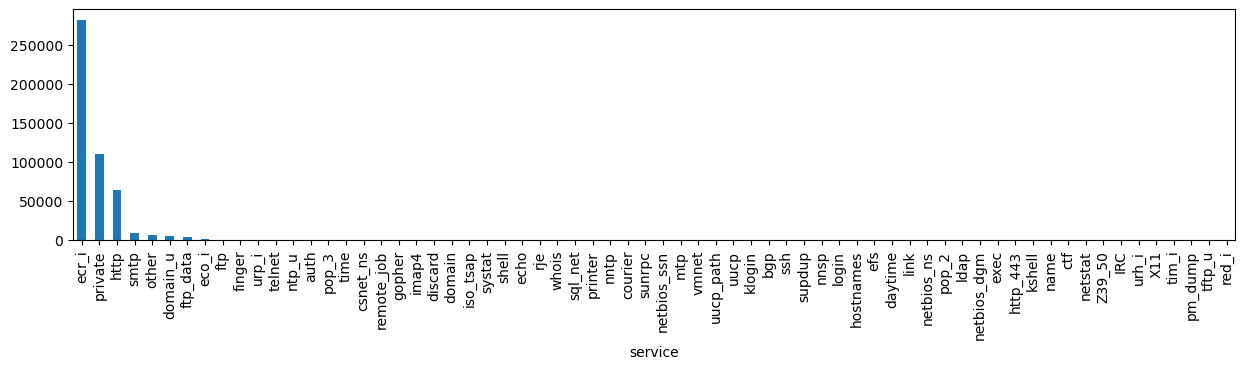

In [20]:
plt.figure(figsize=(15,3))
bar_graph('service')

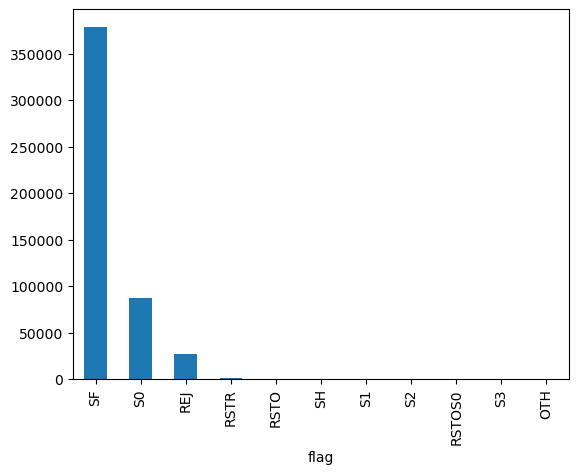

In [21]:
bar_graph('flag')

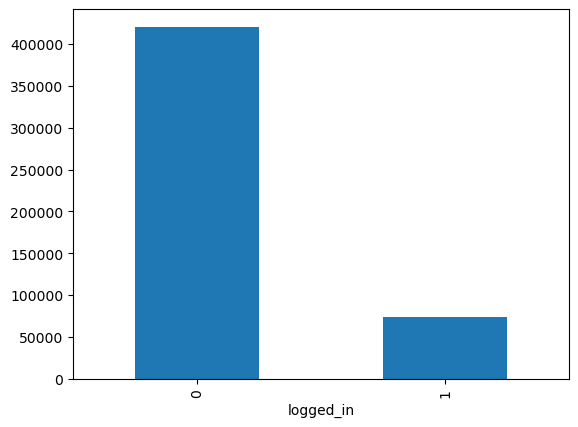

In [22]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

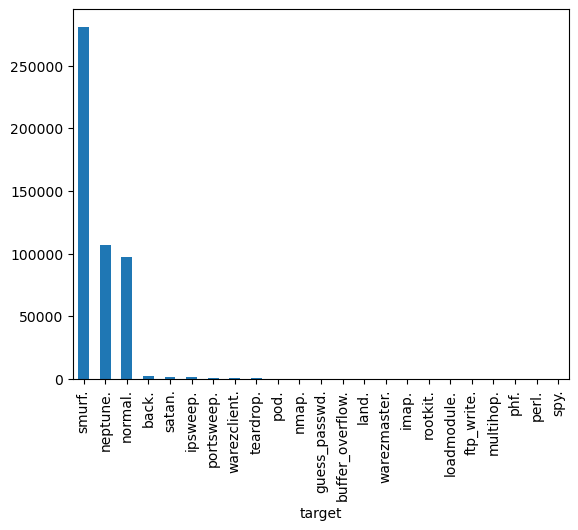

In [25]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

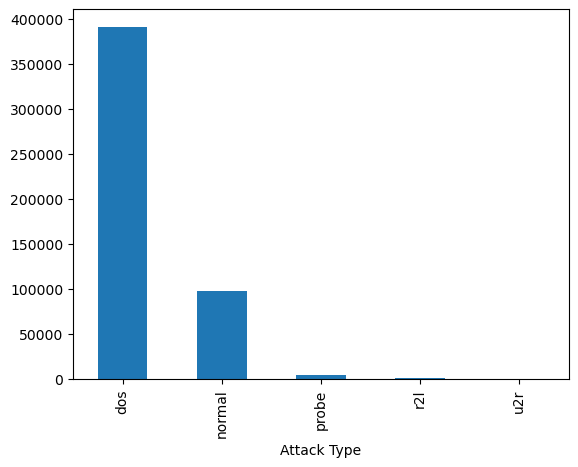

In [27]:
bar_graph('Attack Type')

In [28]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION

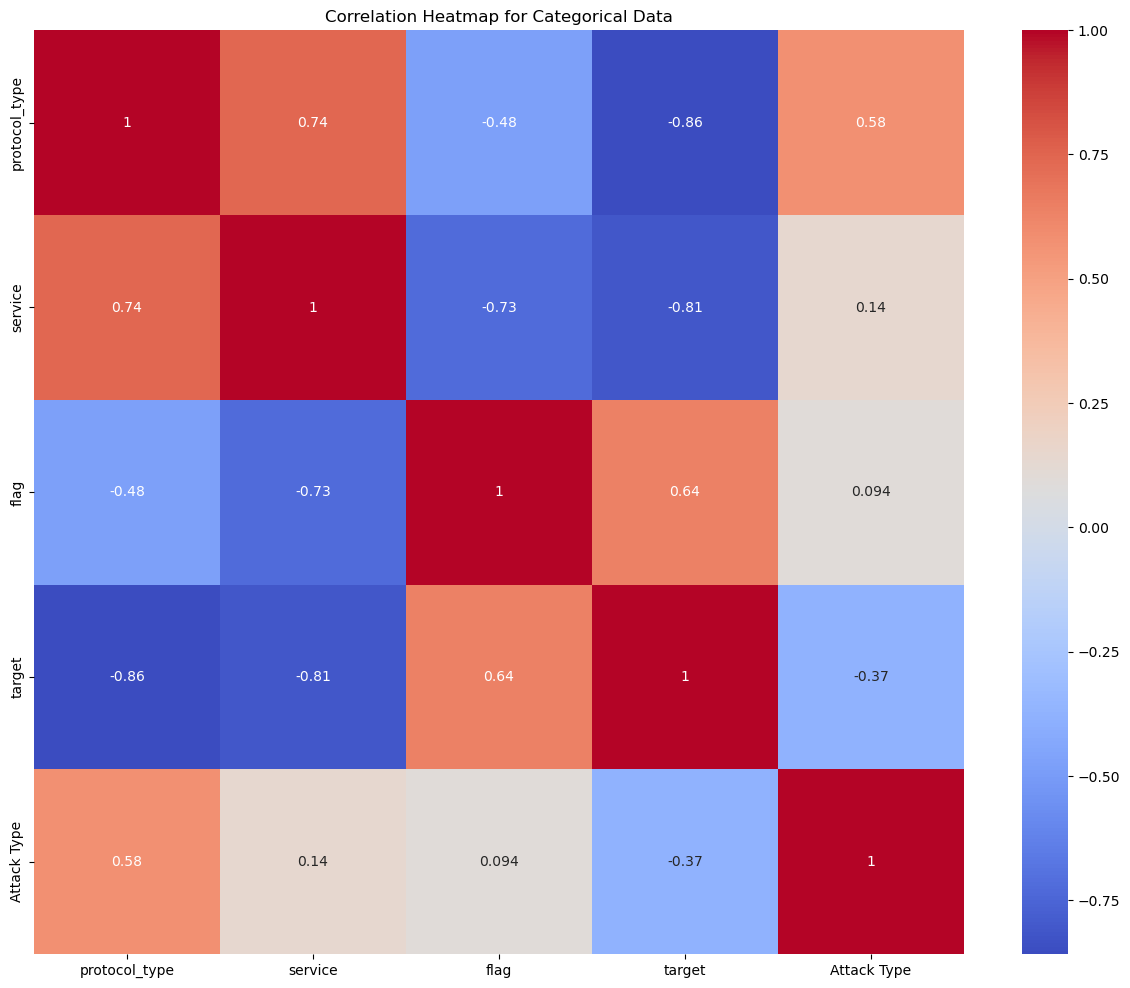

In [30]:
from sklearn.preprocessing import LabelEncoder

# Filter non-numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical data using LabelEncoder
encoded_df = df[categorical_cols].apply(LabelEncoder().fit_transform)

# Calculate the correlation matrix
corr = encoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Categorical Data')
plt.show()


In [31]:
df['num_root'].corr(df['num_compromised'])

0.9938277978738129

In [32]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615072725588

In [33]:
df['srv_count'].corr(df['count'])

0.9436670688882609

In [34]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818195

In [35]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953938

In [36]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373276

In [37]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110384

In [38]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342691318

In [39]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630323971

In [40]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783212

In [41]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680105014

In [42]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373957

In [43]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485679914

In [44]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091849968

In [45]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994792495607

In [46]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308442

In [47]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751446

In [48]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845719

In [49]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [50]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [51]:
df.shape

(494021, 35)

In [52]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [53]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Calculate standard deviation for numeric columns
df_std = numeric_cols.std()

# Sort values in ascending order
df_std = df_std.sort_values(ascending=True)

# Display the result
print(df_std)


is_host_login                       0.000000
num_outbound_cmds                   0.000000
urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compro

FEATURE MAPPING

In [55]:
df['protocol_type'].value_counts()

protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64

In [56]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [57]:
df['flag'].value_counts()

flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64

In [58]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [59]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [60]:
df.drop('service',axis = 1,inplace= True)

In [61]:
df.shape

(494021, 34)

In [62]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [63]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate            

MODELLING

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [66]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 33)
(330994, 32) (163027, 32)
(330994, 1) (163027, 1)


GAUSSIAN NAIVE BAYES

In [68]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [69]:
model1 = GaussianNB()

In [70]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [71]:
print("Training time: ",end_time-start_time)

Training time:  0.8829827308654785


In [72]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [73]:
print("Testing time: ",end_time-start_time)

Testing time:  0.46451830863952637


In [74]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


DECISION TREE

In [76]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [77]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [78]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [79]:
print("Training time: ",end_time-start_time)

Training time:  1.8342328071594238


In [80]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [81]:
print("Testing time: ",end_time-start_time)

Testing time:  0.03870129585266113


In [82]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


RANDOM FOREST

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model3 = RandomForestClassifier(n_estimators=30)

In [86]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [87]:
print("Training time: ",end_time-start_time)

Training time:  13.132599115371704


In [88]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [89]:
print("Testing time: ",end_time-start_time)

Testing time:  0.8016924858093262


In [90]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.99997583037759
Test score is: 0.999717838149509


LOGISTIC REGRESSION

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
model5 = LogisticRegression(max_iter=1200000)

In [94]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [95]:
print("Training time: ",end_time-start_time)

Training time:  7.61672043800354


In [96]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [97]:
print("Testing time: ",end_time-start_time)

Testing time:  0.022695302963256836


In [98]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9935044139772926
Test score is: 0.9934796076723488


RIDGE CLASSIFIER

In [100]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your preprocessed DataFrame
# Check for available columns and drop accordingly
columns_to_drop = ['Attack Type']  # Only drop 'Attack Type'
if 'target' in df.columns:         # Add 'target' if it exists
    columns_to_drop.append('target')

# Separating features (X) and target (y)
X = df.drop(columns=columns_to_drop, axis=1)
y = df['Attack Type']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalizing the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.33, random_state=42)

# Initializing Ridge Classifier
ridge_clf = RidgeClassifier(random_state=42)

# Fitting the model to the training data
ridge_clf.fit(X_train, y_train)

# Predicting on test data
y_test_pred = ridge_clf.predict(X_test)

# Evaluating model performance
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the accuracy
print(f"Ridge Classifier Testing Accuracy: {test_accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Ridge Classifier Testing Accuracy: 99.00%

Classification Report on Test Data:
               precision    recall  f1-score   support

         dos       1.00      0.99      1.00    129106
      normal       0.96      1.00      0.98     32167
       probe       0.94      0.76      0.84      1348
         r2l       0.77      0.27      0.40       387
         u2r       0.89      0.42      0.57        19

    accuracy                           0.99    163027
   macro avg       0.91      0.69      0.76    163027
weighted avg       0.99      0.99      0.99    163027



ETC

In [102]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your preprocessed DataFrame
# Check for available columns and drop accordingly
columns_to_drop = ['Attack Type']  # Only drop 'Attack Type'
if 'target' in df.columns:         # Add 'target' if it exists
    columns_to_drop.append('target')

# Separating features (X) and target (y)
X = df.drop(columns=columns_to_drop, axis=1)
y = df['Attack Type']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalizing the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.33, random_state=42)

# Initializing Extra Trees Classifier
et_clf = ExtraTreesClassifier(
    n_estimators=50,        # Reduced number of estimators for faster training
    random_state=42         # Reproducibility
)

# Fitting the model to the training data
et_clf.fit(X_train, y_train)

# Predicting on test data
y_test_pred = et_clf.predict(X_test)

# Evaluating model performance
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the accuracy
print(f"Extra Trees Classifier Testing Accuracy: {test_accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Extra Trees Classifier Testing Accuracy: 99.97%

Classification Report on Test Data:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       1.00      1.00      1.00     32167
       probe       1.00      0.99      0.99      1348
         r2l       0.98      0.95      0.97       387
         u2r       0.93      0.68      0.79        19

    accuracy                           1.00    163027
   macro avg       0.98      0.93      0.95    163027
weighted avg       1.00      1.00      1.00    163027



Passive-Aggressive

In [104]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your preprocessed DataFrame
# Check for available columns and drop accordingly
columns_to_drop = ['Attack Type']  # Only drop 'Attack Type'
if 'target' in df.columns:         # Add 'target' if it exists
    columns_to_drop.append('target')

# Separating features (X) and target (y)
X = df.drop(columns=columns_to_drop, axis=1)
y = df['Attack Type']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalizing the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.33, random_state=42)

# Initializing Passive-Aggressive Classifier
passive_aggressive_clf = PassiveAggressiveClassifier(random_state=42)

# Fitting the model to the training data
passive_aggressive_clf.fit(X_train, y_train)

# Predicting on test data
y_test_pred = passive_aggressive_clf.predict(X_test)

# Evaluating model performance
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the accuracy
print(f"Passive-Aggressive Classifier Testing Accuracy: {test_accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Passive-Aggressive Classifier Testing Accuracy: 99.68%

Classification Report on Test Data:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       0.99      0.99      0.99     32167
       probe       0.92      0.92      0.92      1348
         r2l       0.84      0.82      0.83       387
         u2r       0.86      0.32      0.46        19

    accuracy                           1.00    163027
   macro avg       0.92      0.81      0.84    163027
weighted avg       1.00      1.00      1.00    163027



TRAINING ACCURACY

<BarContainer object of 7 artists>

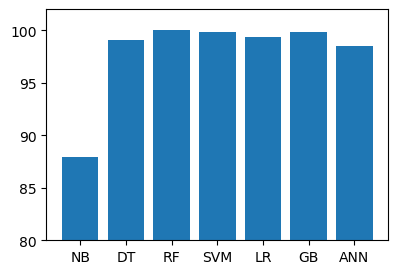

In [106]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.951,99.058,99.997,99.875,99.352,99.793,98.485]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [107]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

<BarContainer object of 7 artists>

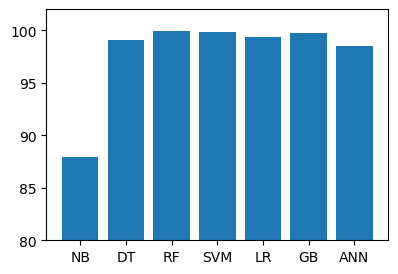

In [109]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.903,99.052,99.969,99.879,99.352,99.771,98.472]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [110]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

TRAINING TIME

<BarContainer object of 7 artists>

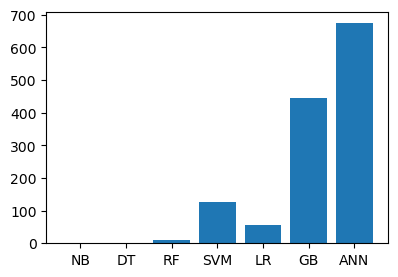

In [112]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [1.04721,1.50483,11.45332,126.96016,56.67286,446.69099,674.12762]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [113]:
f.savefig('train_time_figure.png',bbox_inches='tight')

TESTING TIME

<BarContainer object of 7 artists>

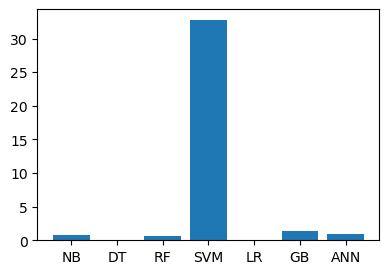

In [115]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [0.79089,0.10471,0.60961,32.72654,0.02198,1.41416,0.96421]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [116]:
f.savefig('test_time_figure.png',bbox_inches='tight')

In [122]:
import nest_asyncio
nest_asyncio.apply()

import pyshark
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import asyncio

# === Data Preparation ===
columns_to_drop = ['Attack Type', 'target'] if 'target' in df.columns else ['Attack Type']
X = df.drop(columns=columns_to_drop, axis=1)
y = df['Attack Type']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.33, random_state=42)

model = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(X_train, y_train)

print("Model trained successfully!")

# === Real-Time Packet Capture (Synchronous) ===
def capture_wifi_packets(interface='Wi-Fi'):
    """
    Captures live packets from the specified Wi-Fi interface synchronously.
    """
    capture = pyshark.LiveCapture(interface=interface)
    for packet in capture.sniff_continuously(packet_count=10):  # Capture 10 packets
        try:
            features = [
                int(packet.length),
                int(packet.ip.ttl) if hasattr(packet.ip, 'ttl') else 0,
                len(packet.layers),
            ]
            yield features
        except AttributeError:
            continue

# === Real-Time Detection ===
def real_time_detection(new_data):
    """
    Detect intrusions based on real-time packet features.
    """
    scaled_data = scaler.transform([new_data])
    prediction = model.predict(scaled_data)
    decoded_prediction = label_encoder.inverse_transform(prediction)
    return decoded_prediction[0]

# === Main Loop for Live Detection ===
async def main(interface='Wi-Fi'):
    print("Starting real-time intrusion detection on interface:", interface)
    loop = asyncio.get_event_loop()
    for packet_features in capture_wifi_packets(interface):
        while len(packet_features) < X.shape[1]:
            packet_features.append(0)  # Pad missing features with 0

        result = await loop.run_in_executor(
            None, real_time_detection, packet_features[:X.shape[1]]
        )
        print(f"Detection Result: {result} | Features: {packet_features}")
        await asyncio.sleep(1)  # Simulate processing delay

# === Run the Main Function ===
await main(interface='Wi-Fi')


Model trained successfully!
Starting real-time intrusion detection on interface: Wi-Fi


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Detection Result: normal | Features: [340, 57, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Detection Result: normal | Features: [89, 57, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Detection Result: normal | Features: [85, 57, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Detection Result: normal | Features: [54, 128, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Detection Result: normal | Features: [134, 128, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Detection Result: normal | Features: [54, 57, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Detection Result: normal | Features: [134, 128, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Detection Result: normal | Features: [858, 128, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Detection Result: normal | Features: [319, 57, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Detection Result: normal | Features: [104, 57, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
